In [25]:
#Importamos los modulos que se utilizarán 
import pandas as pd
import numpy as np 

In [26]:
#Importamos y visualizamos los datos
file_to_load = "Resources/MEDICIONES-RESTRICCION-CRECIMIENTO.csv"
fetos_df = pd.read_csv(file_to_load)
fetos_df.head(10)

,Dx postnatal,birth length,length perc,z score length,birth weight,percentile bw,percentile range bw,z score bw,Cephalic Perimeter,CP percentile,z score CP
0,Normal,50.0,89.22,1.2382,2900.0,42.20,10-90,-0.1967,34.0,80.04,0.8430
1,Normal,45.0,19.31,-0.8665,2380.0,27.20,10-90,-0.6069,33.0,75.91,0.7033
2,Normal,48.0,54.68,0.1176,2655.0,23.03,10-90,-0.7377,31.0,4.73,-1.6716
3,Normal,47.0,53.46,0.0868,2460.0,30.78,10-90,-0.5021,33.0,66.40,0.4234
4,Normal,49.0,59.49,0.2401,3155.0,57.72,10-90,0.1948,35.0,89.41,1.2487
5,Normal,51.0,92.93,1.4704,2770.0,25.89,10-90,-0.6467,34.0,70.61,0.5420
6,Normal,50.0,67.31,0.4484,3595.0,78.03,10-90,0.7732,36.0,97.20,1.9111
7,Normal,49.0,65.12,0.3886,2900.0,33.06,10-90,-0.4382,34.0,74.63,0.6630
8,Macrosomy,40.0,0.00,-3.9392,3776.0,96.91,>90,1.8683,35.0,95.09,1.6533
9,Normal,49.0,57.14,0.1799,3180.0,57.78,10-90,0.1961,36.0,97.55,1.9677


In [27]:
#Observamos sus dimensiones
fetos_df.shape

(266, 11)

In [28]:
fetos_df.columns

Index(['Dx postnatal', 'birth length', 'length perc', 'z score length',
       'birth weight', 'percentile bw', 'percentile range bw', 'z score bw',
       'Cephalic Perimeter', 'CP percentile', 'z score CP'],
      dtype='object')

In [29]:
#Se analiza cuantos valores no nulos existen 
fetos_df.count()

Dx postnatal           218
birth length           224
length perc            216
z score length         216
birth weight           225
percentile bw          217
percentile range bw    217
z score bw             217
Cephalic Perimeter     207
CP percentile          202
z score CP             202
dtype: int64

In [30]:
fetos_df.dtypes
#La columna de percentil range bw no nos sirve porque solo es tipo string
#Y ya tenemos la etiqueta del Dx postnatal 

Dx postnatal            object
birth length           float64
length perc            float64
z score length         float64
birth weight           float64
percentile bw           object
percentile range bw     object
z score bw             float64
Cephalic Perimeter     float64
CP percentile          float64
z score CP             float64
dtype: object

In [31]:
#Limpieza de los datos
delete_list = ["percentile range bw"]
fetos_df = fetos_df.drop(delete_list, axis= 1)


In [32]:
fetos_df.count()

Dx postnatal          218
birth length          224
length perc           216
z score length        216
birth weight          225
percentile bw         217
z score bw            217
Cephalic Perimeter    207
CP percentile         202
z score CP            202
dtype: int64

In [33]:
fetos_df.isnull().sum()

Dx postnatal          48
birth length          42
length perc           50
z score length        50
birth weight          41
percentile bw         49
z score bw            49
Cephalic Perimeter    59
CP percentile         64
z score CP            64
dtype: int64

In [34]:
fetos_df = fetos_df.dropna()
fetos_df.isnull().sum()

Dx postnatal          0
birth length          0
length perc           0
z score length        0
birth weight          0
percentile bw         0
z score bw            0
Cephalic Perimeter    0
CP percentile         0
z score CP            0
dtype: int64

In [35]:
#Dimensiones después de la limpieza de datos
fetos_df.shape

(202, 10)

In [38]:
fetos_df.loc[fetos_df['percentile bw'] == '70-16']

,Dx postnatal,birth length,length perc,z score length,birth weight,percentile bw,z score bw,Cephalic Perimeter,CP percentile,z score CP
218,Normal,42.0,7.24,-1.4585,2445.0,70-16,0.5291,33.0,86.83,1.1182


In [39]:
fetos_df.at[218,'percentile bw'] = 70.16

In [40]:
#Verificamos que el tipo de datos sean correctos 
fetos_df['percentile bw'] = fetos_df['percentile bw'].astype(float)

In [42]:
fetos_df.dtypes

Dx postnatal           object
birth length          float64
length perc           float64
z score length        float64
birth weight          float64
percentile bw         float64
z score bw            float64
Cephalic Perimeter    float64
CP percentile         float64
z score CP            float64
dtype: object

In [46]:
fetos_df['Dx postnatal'].value_counts()

Restriction    103
Normal          77
Small           21
Macrosomy        1
Name: Dx postnatal, dtype: int64

In [60]:
X, y = fetos_df.iloc[:,1:].values, fetos_df.iloc[:,0].values 
X

array([[ 5.0000e+01,  8.9220e+01,  1.2382e+00, ...,  3.4000e+01,
         8.0040e+01,  8.4300e-01],
       [ 4.5000e+01,  1.9310e+01, -8.6650e-01, ...,  3.3000e+01,
         7.5910e+01,  7.0330e-01],
       [ 4.8000e+01,  5.4680e+01,  1.1760e-01, ...,  3.1000e+01,
         4.7300e+00, -1.6716e+00],
       ...,
       [ 4.7000e+01,  1.3210e+01, -1.1167e+00, ...,  3.2500e+01,
        -9.9000e-01, -9.9150e-01],
       [ 4.4000e+01,  3.7820e+01, -3.1030e-01, ...,  3.1000e+01,
         4.7620e+01, -5.9600e-02],
       [ 4.3000e+01,  8.6000e-01, -2.3830e+00, ...,  3.1000e+01,
         8.2600e+00, -1.3881e+00]])

In [59]:
#PCA funciona mejor con un conjunto de características normalizadas. 
#Realizaremos una normalización escalar estándar para normalizar nuestro conjunto de características. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_std = sc.fit_transform(X)
data_std

array([[ 1.30178164,  2.48791175,  1.74570521, ...,  0.87391304,
         1.60011039,  1.02727739],
       [ 0.26975695, -0.14865165,  0.21565639, ...,  0.57282071,
         1.45880123,  0.93109037],
       [ 0.88897176,  1.18528123,  0.93106526, ..., -0.02936396,
        -0.97664337, -0.70408895],
       ...,
       [ 0.68256683, -0.3787051 ,  0.03376909, ...,  0.42227454,
        -1.17235485, -0.23582273],
       [ 0.06335201,  0.54942858,  0.6199958 , ..., -0.02936396,
         0.49085057,  0.40581423],
       [-0.14305293, -0.84446905, -0.88679005, ..., -0.02936396,
        -0.85586339, -0.50889196]])

In [85]:
#Usaremos PCA de sklearn como punto de referencia para verificar al final que nuestros componentes 
#obtenidos manualmente son correctos
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_stdpca = pca.fit_transform(data_std)
#X_train_stdpca = pd.DataFrame(X_train_stdpca)
X_train_stdpca

array([[ 4.41237720e+00,  5.18153799e-01, -7.93124227e-01],
       [ 1.81382004e+00,  3.54115948e-01,  1.11991371e+00],
       [ 1.19554164e+00,  1.19987506e-01, -2.01989430e+00],
       [ 2.58057510e+00,  4.29859100e-01, -7.93045815e-02],
       [ 4.53348310e+00,  8.92706258e-01,  4.18775711e-01],
       [ 3.93772177e+00, -2.01917676e-01, -1.25424153e+00],
       [ 5.84684134e+00,  1.39594638e+00,  5.94834100e-01],
       [ 3.50746085e+00,  1.15837684e-01, -2.48651387e-01],
       [ 3.79076155e+00,  3.09253333e+00,  3.49763502e+00],
       [ 4.86046566e+00,  7.33325035e-01,  9.33847835e-01],
       [ 1.22846296e+00, -1.09817530e+00, -1.60466756e+00],
       [ 1.74859417e+00, -5.74249671e-01, -5.08662174e-01],
       [-1.20207216e-01, -9.71942483e-01, -7.03829424e-01],
       [ 6.63308685e+00,  1.99093980e+00,  2.48548867e-01],
       [ 1.20787053e+00, -1.03623078e+00, -4.93896827e-01],
       [ 1.57423354e-01,  9.07397769e-01, -3.21625400e+00],
       [-5.65909652e-01, -1.30484936e+00

In [86]:
pca.explained_variance_

array([5.28250236, 1.33346404, 1.25828469])

In [87]:
print( pca.components_)

[[ 3.39279078e-01  3.36579511e-01  3.36655984e-01  3.62114574e-01
   2.93991911e-01  3.26273343e-01  3.31008120e-01  3.49538614e-01
   3.20172715e-01]
 [-4.07657715e-01  9.69237275e-02  1.75124415e-02 -2.31532842e-01
   5.58087596e-01  4.89570924e-01 -4.56625526e-01  8.56958518e-02
  -5.92851645e-02]
 [-3.21303554e-01 -4.09704118e-01 -4.35357725e-01 -7.85598268e-02
   4.71536957e-02 -5.16320672e-04  2.88647461e-01  4.10869225e-01
   5.28056771e-01]]


/var/folders/27/l_zwfs3x6f94rcf0f97504t00000gn/T/ipykernel_35786/1906978373.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


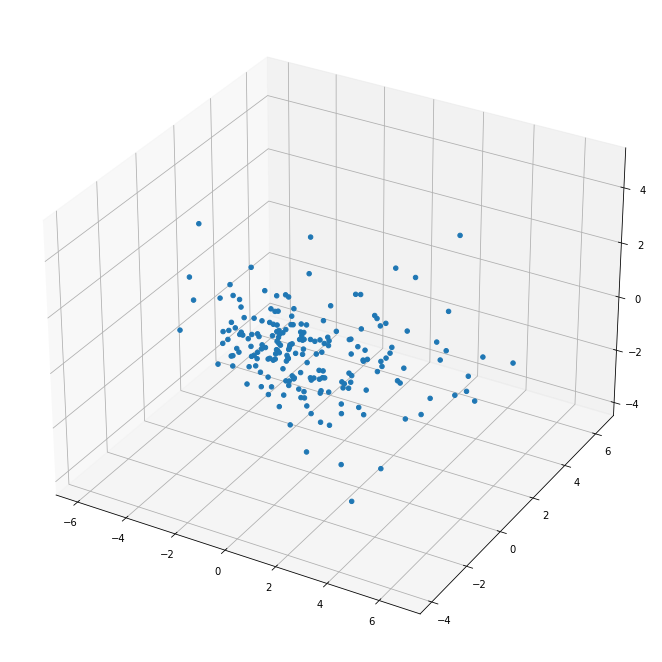

In [88]:
plt.rcParams['figure.figsize'] = (12,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_stdpca[:,0],X_train_stdpca[:,1],X_train_stdpca[:,2], alpha=1)

In [66]:
#Funcion obtener matriz de covarianza
def matrix_covariance(m):
    
    X = np.array(m, ndmin=2)
    X= X.T
    w = None
    ddof = 1 
    avg, w_sum = np.average(X, axis=1, weights=w, returned=True)
    w_sum = w_sum[0]
    fact = X.shape[1] - ddof
    X -= avg[:, None]
    X_T = X.T
    c = np.dot(X, X_T.conj())
    c *= np.true_divide(1, fact)
    return c.squeeze()

In [67]:
#Obtenemos la matriz de covarianza de nuestros datos ya estandarizados y verificamos que la dimension sea correcta:17 x 17
cov_mat = matrix_covariance(data_std)
print(cov_mat[1])
print(cov_mat.shape)

[0.64784885 1.00497512 0.86542088 0.53405471 0.51388051 0.53836241
 0.36374041 0.48869786 0.36617279]
(9, 9)


In [68]:
#Obtenemos eigenvalores y eigenvectores 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals: ',eigen_vals)
print(eigen_vals.shape)

#Vemos que coinciden con los de sklearn

Eigenvals:  [5.28250236 1.33346404 1.25828469 0.66164535 0.01304544 0.04024934
 0.09602678 0.20945237 0.15010575]
(9,)


In [69]:
eigen_vecs[0]

array([ 0.33927908,  0.40765772, -0.32130355,  0.17211634, -0.54182994,
        0.37267893, -0.35685189,  0.06442863, -0.14792328])

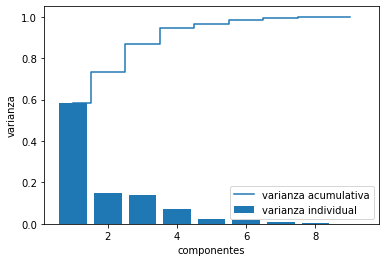

In [72]:
#Ahora graficamos la covarianza individual y acumulada de cada componente para verificar cuales son las tres principales componentes.
import matplotlib.pyplot as plt
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) #Ordenar los eigenvalores
plt.bar(range(1,10),var_exp, label = 'varianza individual',align='center')
plt.step(range(1,10),cum_var_exp, where='mid',label='varianza acumulativa')
plt.xlabel('componentes')
plt.ylabel('varianza')
plt.legend(loc='best')
plt.show()

In [79]:
eigen_par = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_par.sort(key = lambda k: k[0], reverse = True)
#Ya ordenamos eigen valores y eigen vectores
print(eigen_par[0])

(5.282502364184914, array([0.33927908, 0.33657951, 0.33665598, 0.36211457, 0.29399191,
       0.32627334, 0.33100812, 0.34953861, 0.32017271]))


In [80]:
#El acumulado de las tres principales componentes:
print(cum_var_exp[2])

0.8705855167149844


In [81]:
w = np.hstack( (eigen_par[0][1][:,np.newaxis],
              eigen_par[1][1][:,np.newaxis],
               eigen_par[2][1][:,np.newaxis]))
print('W = \n',w)

W = 
 [[ 3.39279078e-01  4.07657715e-01 -3.21303554e-01]
 [ 3.36579511e-01 -9.69237275e-02 -4.09704118e-01]
 [ 3.36655984e-01 -1.75124415e-02 -4.35357725e-01]
 [ 3.62114574e-01  2.31532842e-01 -7.85598268e-02]
 [ 2.93991911e-01 -5.58087596e-01  4.71536957e-02]
 [ 3.26273343e-01 -4.89570924e-01 -5.16320672e-04]
 [ 3.31008120e-01  4.56625526e-01  2.88647461e-01]
 [ 3.49538614e-01 -8.56958518e-02  4.10869225e-01]
 [ 3.20172715e-01  5.92851645e-02  5.28056771e-01]]


In [82]:
X_train_pca = data_std.dot(w)
X_train_pca

array([[ 4.41237720e+00, -5.18153799e-01, -7.93124227e-01],
       [ 1.81382004e+00, -3.54115948e-01,  1.11991371e+00],
       [ 1.19554164e+00, -1.19987506e-01, -2.01989430e+00],
       [ 2.58057510e+00, -4.29859100e-01, -7.93045815e-02],
       [ 4.53348310e+00, -8.92706258e-01,  4.18775711e-01],
       [ 3.93772177e+00,  2.01917676e-01, -1.25424153e+00],
       [ 5.84684134e+00, -1.39594638e+00,  5.94834100e-01],
       [ 3.50746085e+00, -1.15837684e-01, -2.48651387e-01],
       [ 3.79076155e+00, -3.09253333e+00,  3.49763502e+00],
       [ 4.86046566e+00, -7.33325035e-01,  9.33847835e-01],
       [ 1.22846296e+00,  1.09817530e+00, -1.60466756e+00],
       [ 1.74859417e+00,  5.74249671e-01, -5.08662174e-01],
       [-1.20207216e-01,  9.71942483e-01, -7.03829424e-01],
       [ 6.63308685e+00, -1.99093980e+00,  2.48548867e-01],
       [ 1.20787053e+00,  1.03623078e+00, -4.93896827e-01],
       [ 1.57423354e-01, -9.07397769e-01, -3.21625400e+00],
       [-5.65909652e-01,  1.30484936e+00

In [83]:
#Graficamos 3 compontentes principales
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [115]:
y_series = pd.Series(y)
#Tenemos cuatro categorías diferentes
y_series = y_series.replace(to_replace=['Restriction', 'Normal', 'Small','Macrosomy' ], value = [0,1,2,3])
y_series.value_counts()

0    103
1     77
2     21
3      1
dtype: int64

In [116]:
y_array = y_series.values
y_array

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0,
       2, 1, 1, 0])

/var/folders/27/l_zwfs3x6f94rcf0f97504t00000gn/T/ipykernel_35786/3635145397.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


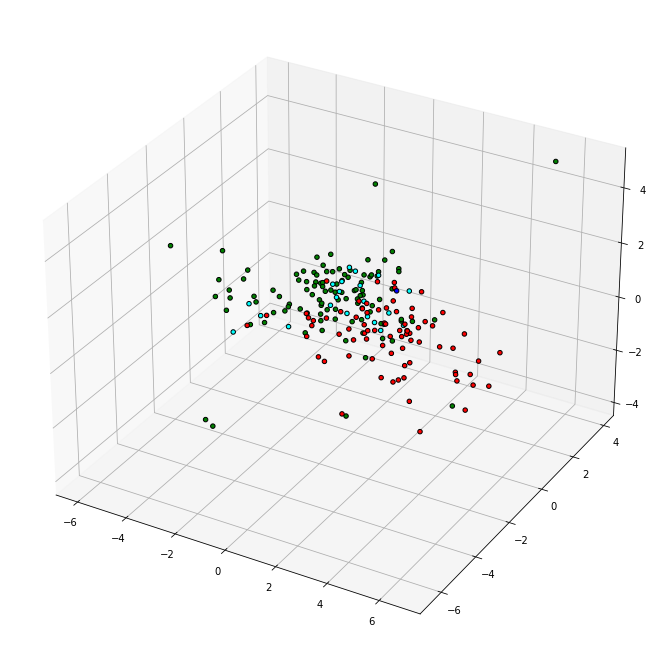

In [120]:
color = np.array(['green','red','cyan','blue','cyan'])
plt.rcParams['figure.figsize'] = (12,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_pca[:,0],X_train_pca[:,1],X_train_pca[:,2], alpha=1, c=color[y_array],edgecolor='black')

In [89]:
#Código para KMeans
import random
def iniciar_centroides(data):
  init_centroids = random.sample(range(0, len(data)), 3)
  centroids = []
  for i in init_centroids:
    centroids.append(data.loc[i])
  centroids = np.array(centroids)
  return centroids

In [90]:
#Desarrollemos una función para calcular la distancia.
from sklearn.metrics import pairwise_distances as pdist
def calc_distance(X1, X2,metric):
    """
    Esta función es un selector entre los métodos de cálculo de distancia: Euclidiana o Manhattan
    
    input
    --------
    X1: Vector 1
    X2: Vector 2
    metric : Un string que indica la distancia a usar ya sea euclidean o manhattan
    
    output
    --------
    El output es el valor calculado de la distancia
    
    """
    if metric == "euclidean":
        return(sum((X1 - X2)**2))**0.5
    
    elif metric == "manhattan":
        return (sum(abs(X1-X2)))

In [91]:
def findClosestCentroids(ic, X, metric):
    """
    Regresa el centroide más cercano al punto según la métrica usada.
    
    
    input
    ------
    ic: Conjunto de centroides
    X: Datos 
    metric: Metrica que queremos usar manhattan o euclidean
    
    output
    -------
    La asignacion al centroide correspondiente (mas cercano de acuerdo a la distancia)
    """
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j, metric))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [92]:
def calc_centroids(clusters, X):
    """
    Calcula los centroides de cada grupo.
    
    input
    --------
    clusters: Número de conjuntos
    X: Datos
    
    output
    -------
    Regresa los nuevos centroides 
    """
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [124]:
X_array = X_train_pca
X_df = pd.DataFrame(X_array)

In [125]:
centroids = iniciar_centroides(X_df)
centroids

array([[ 2.01307207,  0.06384922, -1.45226625],
       [-0.20513341,  0.65466518,  0.60929332],
       [-1.14308527, -1.17160311, -0.37887343]])

In [126]:
for i in range(40):
    get_centroids = findClosestCentroids(centroids, X_array, 'euclidean')
    centroids = calc_centroids(get_centroids, X_array)
    #print(centroids)


/var/folders/27/l_zwfs3x6f94rcf0f97504t00000gn/T/ipykernel_35786/18980101.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


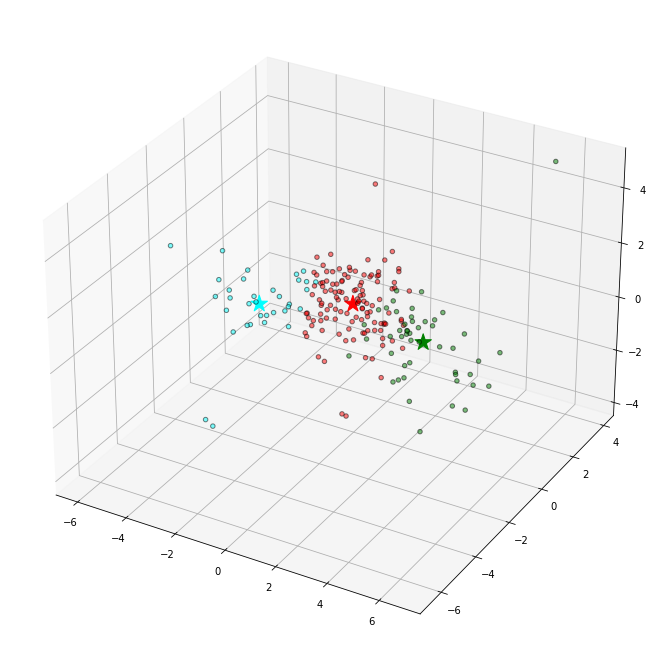

In [132]:
colores = np.array(['green','red','cyan'])
asignar = []
for row in get_centroids:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], np.array(centroids)[:,2], c=colores, marker = '*', s = 300, alpha=1)
ax.scatter(X_array[:, 0], X_array[:, 1], X_array[:, 2],alpha=0.5, c=asignar,edgecolor='black')

In [ ]:
#Se puede visualizar que al hacer tres clusters el algoritmo los ubica de manera correcta
#Podría decirse que los puntos que corresponden a la etiqueta de 'normales'(verdes) estan bastante bien delimitados
#Pero los de 'Restriction' y 'Small' pueden estar un poco encimados

In [137]:
#Clustering de datos sin PCA 
#Seleccionamos las columnas de estatura, peso y perimetro de la cabeza pues pueden ser las más representativas 
caracteristicas = np.array(fetos_df[['birth length', 'birth weight', 'Cephalic Perimeter']])
y_array

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0,
       2, 1, 1, 0])

/var/folders/27/l_zwfs3x6f94rcf0f97504t00000gn/T/ipykernel_35786/3284479662.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


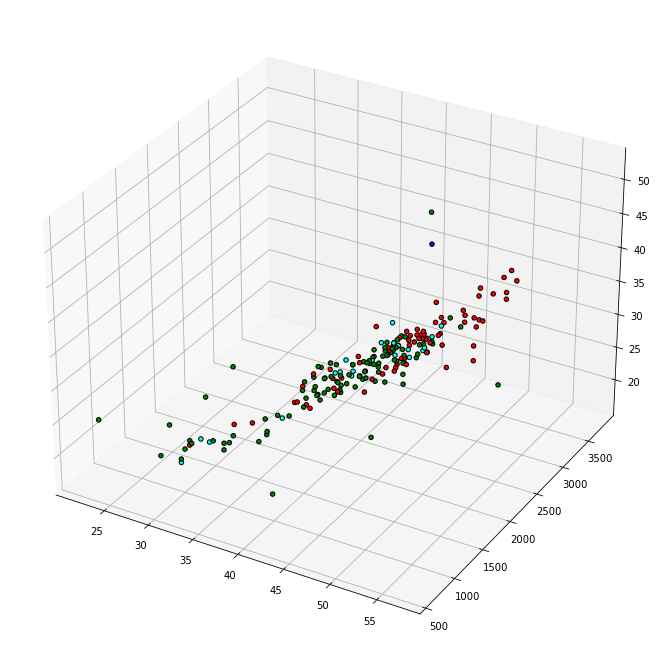

In [138]:
#Proyectamos los puntos antes de KMeans 
color = np.array(['green','red','cyan','blue','cyan'])
plt.rcParams['figure.figsize'] = (12,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(caracteristicas[:,0],caracteristicas[:,1],caracteristicas[:,2], alpha=1, c=color[y_array],edgecolor='black')

In [139]:
X_array = caracteristicas
X_df = pd.DataFrame(X_array)

In [140]:
centroids = iniciar_centroides(X_df)
centroids

array([[  48. , 2465. ,   33. ],
       [  41. , 1595. ,   29. ],
       [  46.5, 2070. ,   31.5]])

In [141]:
for i in range(40):
    get_centroids = findClosestCentroids(centroids, X_array, 'euclidean')
    centroids = calc_centroids(get_centroids, X_array)
    #print(centroids)



/var/folders/27/l_zwfs3x6f94rcf0f97504t00000gn/T/ipykernel_35786/2041848729.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


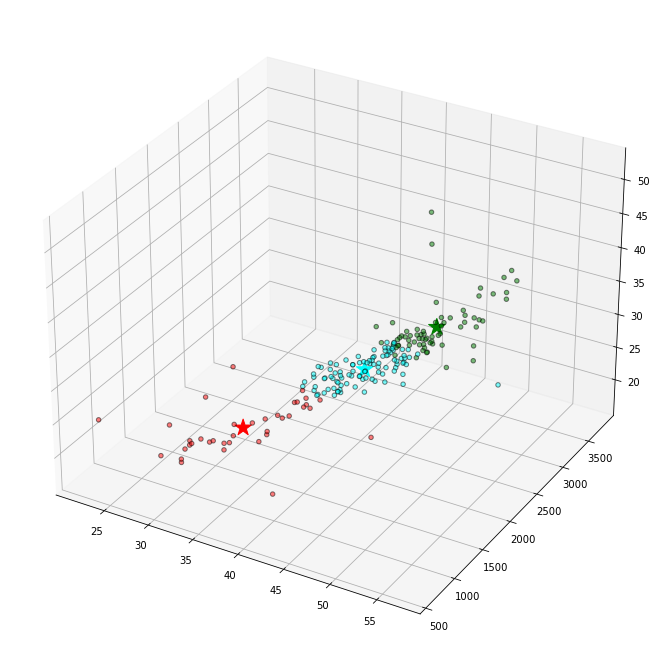

In [142]:
colores = np.array(['green','red','cyan'])
asignar = []
for row in get_centroids:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], np.array(centroids)[:,2], c=colores, marker = '*', s = 300, alpha=1)
ax.scatter(caracteristicas[:, 0], caracteristicas[:, 1], caracteristicas[:, 2],alpha=0.5, c=asignar,edgecolor='black')

In [ ]:
#Para este caso podemos observar que KMeans ubica al cluster de los 'normales' (color verde) en la parte superior
#de la gráfica, esto tiene sentido pues los bebés con mayor altura, peso y diametro de cabeza son bebés relativamente normales
#Por el contrario mientras estas características disminuyen encontramos los clústers de 'Restriction' y 'Small '